# Demo: BasisChebyshev

This script provides a few examples on using the BasisChebyshev class.


Importing modules

In [1]:
from demos.setup import demo, np, plt
from compecon import BasisChebyshev
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days


## EXAMPLE 1:
Using BasisChebyshev to interpolate a 1-D function with a Chebyshev basis

**PROBLEM:** Interpolate the function $y = f(x) = 1 + sin(2x)$ on the domain $[0,\pi]$, using 5 Gaussian nodes.

First, create the function f

In [2]:
f = lambda x: 1 + np.sin(2 * x)

and the Chebyshev basis B. If the type of nodes is unspecified, Gaussian is computed by default

In [3]:
n, a, b = 5, 0, np.pi
B = BasisChebyshev(n, a, b, f=f)

The basis nodes are:

In [4]:
xnodes = B.nodes
print(xnodes)

[[ 0.0769  0.6475  1.5708  2.4941  3.0647]]


We can also plot the Chebyshev basis functions:

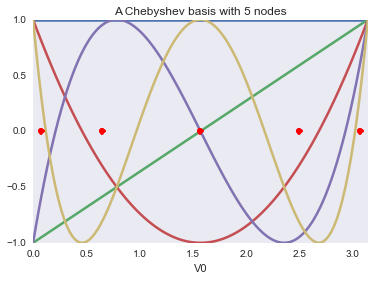

In [5]:
B.plot()

### Fitting a function: set the interpolation coefficients c:

In [6]:
# c = np.mat(np.linalg.solve(B.Phi(), f(xnodes)))  
# notice that Phi is a dictionary, the matrix is indexed by 0

Next plot the function f and its approximation. To evaluate the function defined by the basis B and coefficients c at values x we call the basis directly.

In [7]:
x = np.linspace(a, b, 121)
f_approx = B(x)
f_true = f(x)

We also plot the residuals, showing the residuals at the interpolating nodes (zero by construction)

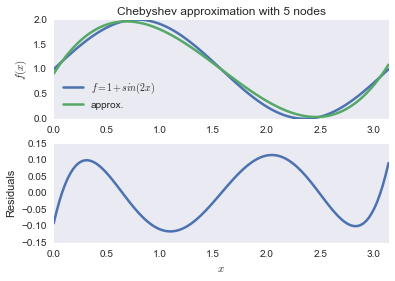

In [8]:
plt.figure()
demo.subplot(2, 1, 1, 'Chebyshev approximation with 5 nodes', '', '$f(x)$', [a, b])
plt.plot(x, np.c_[f_true, f_approx])
plt.legend(['$f = 1 + sin(2x)$', 'approx.'], loc=3)

demo.subplot(2, 1, 2, '', '$x$', 'Residuals', [a, b])
plt.plot(x.T, f_approx - f_true)

Adjusting the number of nodes: to increase accuracy, we make a new basis with 25 nodes.

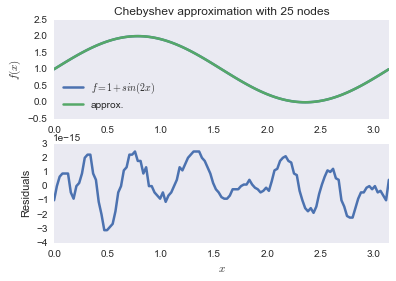

In [9]:
B = BasisChebyshev(25, a, b, f=f)
plt.figure()
demo.subplot(2, 1, 1, 'Chebyshev approximation with 25 nodes', '', '$f(x)$', [a, b])
plt.plot(x, np.c_[f_true, B(x)])
plt.legend(['$f = 1 + sin(2x)$', 'approx.'], loc=3)

demo.subplot(2, 1, 2, '', '$x$', 'Residuals', [a, b])
plt.plot(x.T, B(x) - f_true)

* With previous basis, now compute derivative.

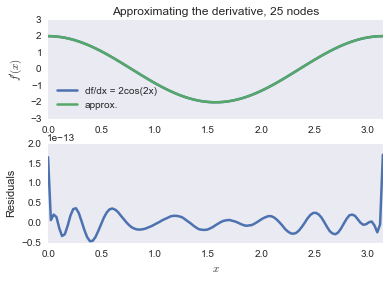

In [10]:
df = lambda x: 2 * np.cos(2 * x)
plt.figure()
demo.subplot(2, 1, 1, 'Approximating the derivative, 25 nodes', '', "$f'(x)$", [a, b])
plt.plot(x, np.c_[df(x), B(x, 1)])  # notice the 1 in B(x, 1) to compute first derivative
plt.legend(['df/dx = 2cos(2x)', 'approx.'], loc=3)

demo.subplot(2, 1, 2, '', '$x$', 'Residuals', [a, b])
plt.plot(x, B(x, 1) - df(x))

*Last updated: November 3, 2015.*

*Copyright (C) 2014-2015 Randall Romero-Aguilar, licensed under the MIT license, see LICENSE.txt*